# Image Classifier
#### Using sequential API

#### Class names as label


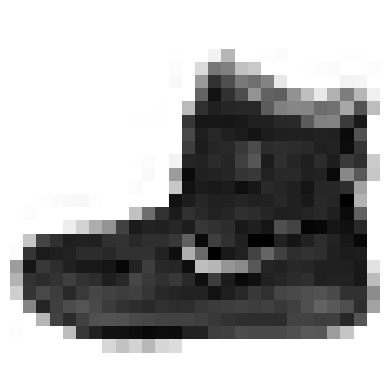

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
import os

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255. ,X_valid/255. , X_test/255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [2]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


### Seuquntial Api



Error saving image: module 'pydot' has no attribute 'InvocationException'


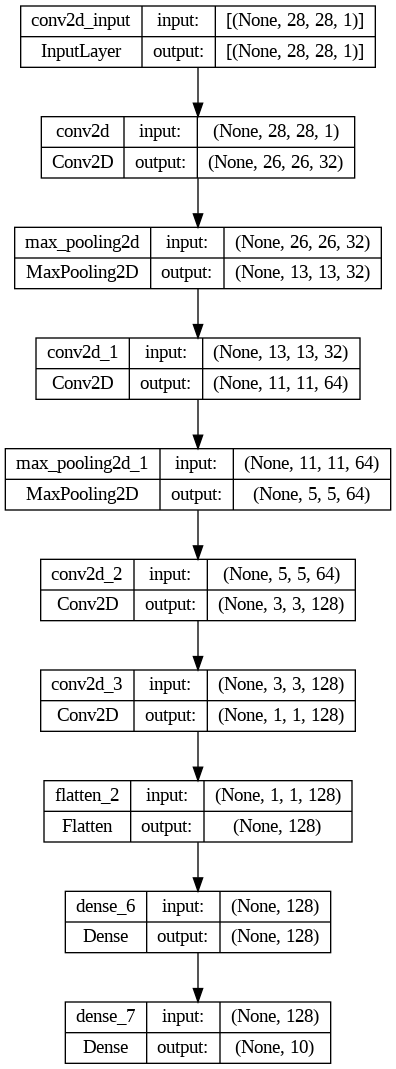

In [3]:
import os
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import tensorflow as tf

model = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Flattening the 3D output to 1D
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(10, activation='softmax')
])


current_directory = os.getcwd()

image_path = os.path.join(current_directory, 'neural_network.png')

try:
    plot_model(model, to_file=image_path, show_shapes=True)
    print("Image saved successfully at:", image_path)
except Exception as e:
    print("Error saving image:", e)

Image(filename=image_path,format='png')


# MNIST Labels and Images

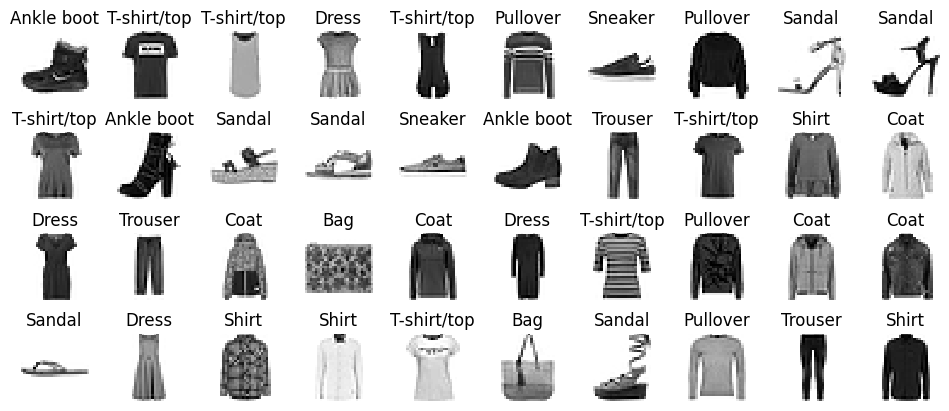

In [4]:
def save_fig(filename):
  plt.savefig(filename, bbox_inches='tight')
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

# Victorization

#### Time Def between Vectorization and Normal Loop on an HD Image

In [5]:
import numpy as np
import tensorflow as tf
import time

def relu_loop_matrix(matrix):
    result = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            result[i, j] = max(0, matrix[i, j])
    return result

# Define a large random matrix representing an image of size 1920x1080
large_matrix = np.random.randn(1920, 1080)

# Vectorized ReLU applied to the matrix
start_time = time.time()
vectorized_matrix_output = tf.nn.relu(large_matrix)
vectorized_matrix_time = time.time() - start_time

# Loop-based ReLU applied to the matrix
start_time = time.time()
loop_matrix_output = relu_loop_matrix(large_matrix)
loop_matrix_time = time.time() - start_time

vectorized_matrix_time, loop_matrix_time


(0.01999831199645996, 1.261002779006958)

#### Time Def between Vectorization  and Normal Loop on MNIST Dataset

In [6]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import time

def relu_loop(vector):
    result = np.zeros_like(vector)
    for i in range(len(vector)):
        result[i] = max(0, vector[i])
    return result

def relu_loop_matrix(matrix):
    result = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            result[i, j] = max(0, matrix[i, j])
    return result

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images for simplicity
flattened_train_images = train_images.reshape((train_images.shape[0], -1))

# Measure execution time for the vectorized version on the entire training set
start_time = time.time()
vectorized_output_images = tf.nn.relu(flattened_train_images)
vectorized_time_images = time.time() - start_time

# Measure execution time for the loop-based version on the entire training set
start_time = time.time()
loop_output_images = np.array([relu_loop(image) for image in flattened_train_images])
loop_time_images = time.time() - start_time

vectorized_time_images, loop_time_images



(0.04299163818359375, 137.1550042629242)

## Training and Testing

In [7]:
import tensorflow as tf

# Model definition
model = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Flattening the 3D output to 1D
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(10, activation='softmax')
])



# Model summary
model.summary()

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

end_time = time.time()

training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 128)        